# Keenan / 0706022310011

## Part A - Data Preparation



In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [175]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [177]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [178]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


## Part B - Exploratory Data Analysis

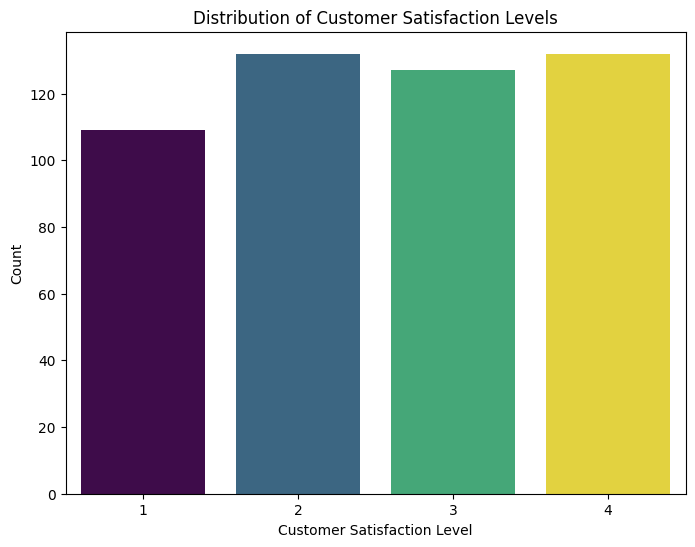

In [179]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Satisfaction', data=df, palette='viridis', hue='Customer_Satisfaction', legend=False)
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.show()

*  Distribution: The height of each bar represents the count of customers corresponding to that specific satisfaction level (1, 2, 3, or 4).
*  Dominant Levels: You can observe which satisfaction levels are most common among your customers. If one bar is significantly taller, it indicates a higher number of customers at that particular satisfaction level.
*  Least Common Levels: Conversely, shorter bars show less frequent satisfaction levels.

Overall Sentiment: By comparing the counts across all levels, you can get a general sense of overall customer sentiment. For example, if levels 3 and 4 have much higher counts than 1 and 2, it suggests a predominantly satisfied customer base.

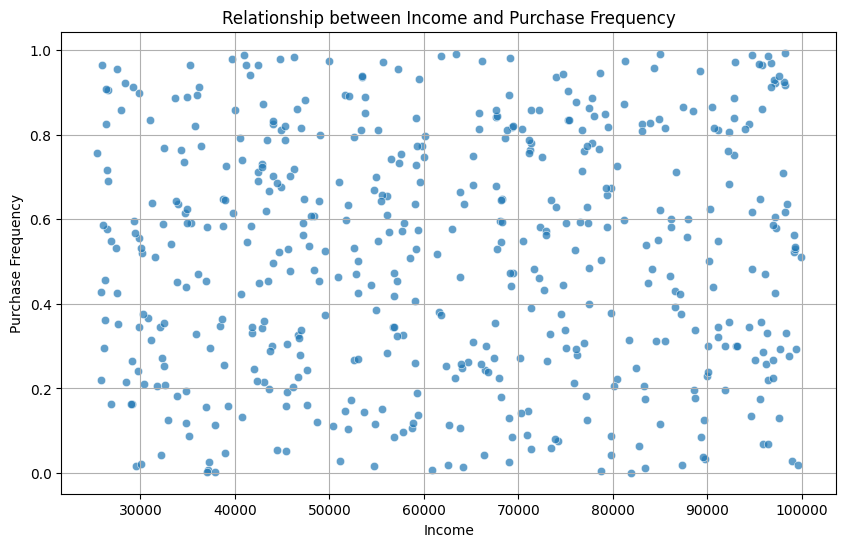

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Purchase_Frequency', data=df, alpha=0.7)
plt.title('Relationship between Income and Purchase Frequency')
plt.xlabel('Income')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.show()

 This indicates little to no linear relationship between a customer's income and how often they make purchases. In simple terms, for this dataset, there would be no correlation between income and purchase frequency.

## Part 3 - Clustering Modeling

In [181]:
from sklearn.preprocessing import StandardScaler

# Assuming numerical_cols has been defined previously, if not, define it:
numerical_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns of the DataFrame
df_scaled_data = scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with the scaled data, preserving column names
df_scaled = pd.DataFrame(df_scaled_data, columns=numerical_cols)

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898


### K-Means Clustering ( Scaled Dataset )

In [182]:
from sklearn.cluster import KMeans

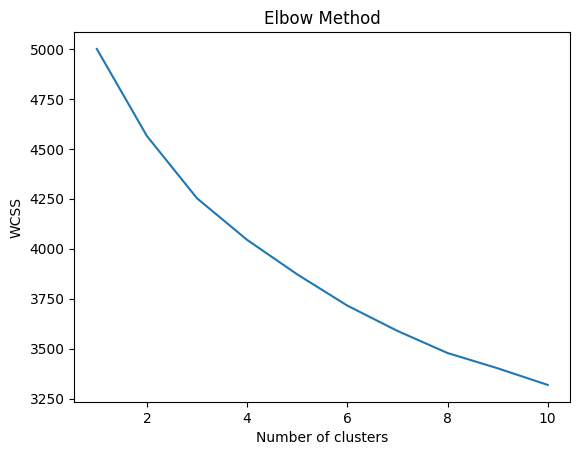

In [183]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [184]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  5000.000000
1                   2  4564.056976
2                   3  4252.194610
3                   4  4044.179034
4                   5  3871.600101
5                   6  3715.253081
6                   7  3588.571377
7                   8  3477.922116
8                   9  3401.535531
9                  10  3318.220339


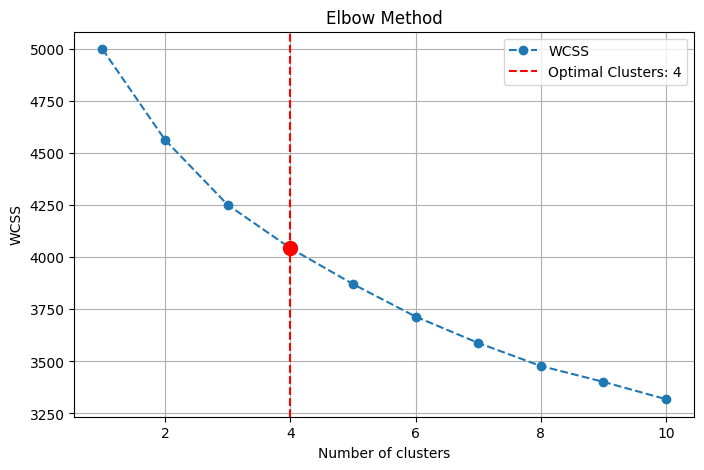

The optimal number of clusters is: 4


In [185]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [186]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


/tmp/ipython-input-2765680267.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)


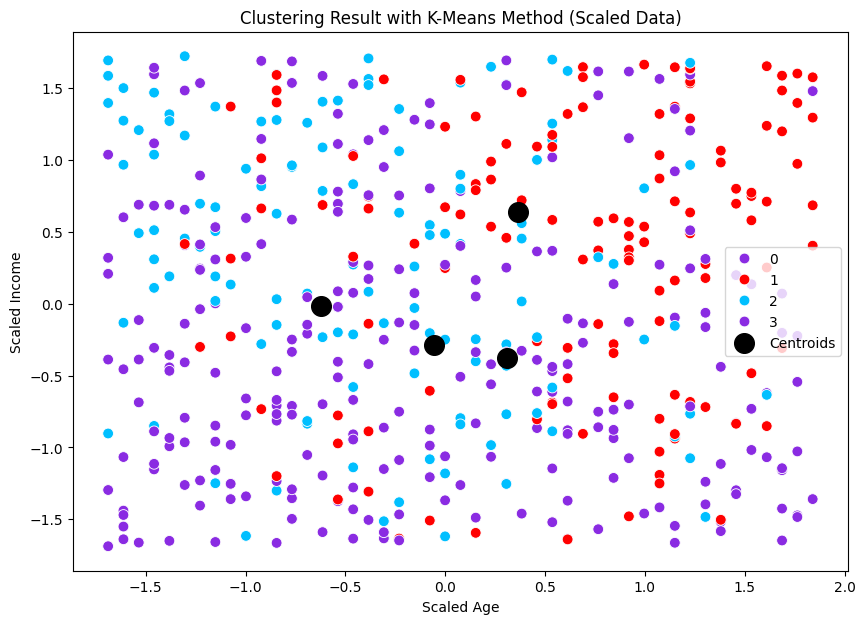

In [187]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

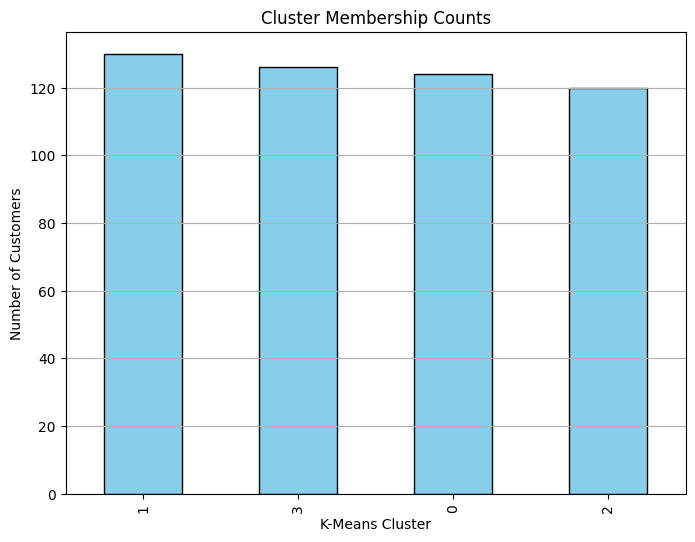

In [188]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [189]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age                Income                          
                     mean min max          mean          min          max
KMeans_cluster                                                           
0               39.846774  18  64  48657.016772  25857.05940  97597.41750
1               48.300000  23  64  70218.570383  26389.13458  98637.20424
2               35.125000  18  61  68994.628670  26850.90463  99913.52549
3               36.269841  18  64  60961.681627  25352.16071  99275.42105

### K-Means Clustering ( Unscaled Dataset )

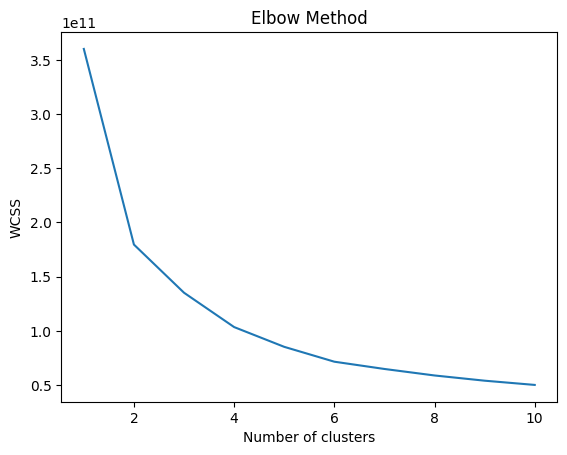

In [190]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [191]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.601357e+11
1                   2  1.796223e+11
2                   3  1.351798e+11
3                   4  1.034966e+11
4                   5  8.526114e+10
5                   6  7.154790e+10
6                   7  6.483984e+10
7                   8  5.884440e+10
8                   9  5.402805e+10
9                  10  5.012191e+10


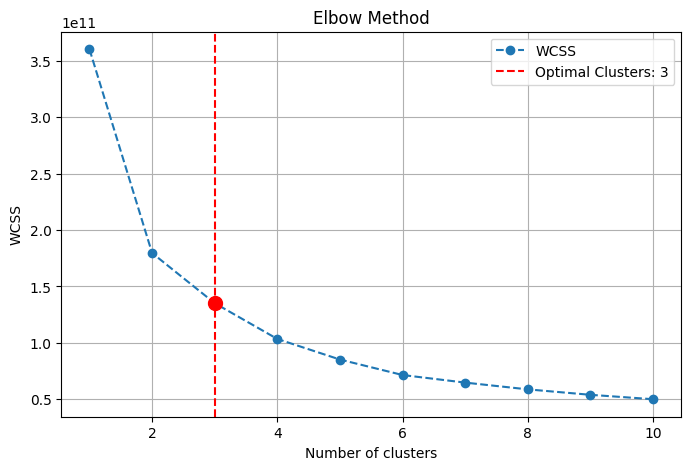

The optimal number of clusters is: 3


In [192]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [193]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters1 = kmeans1.fit_predict(df)

# Add the cluster labels to the DataFrame
df['KMeans_Unscaled_Cluster'] = clusters1

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Unscaled_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1


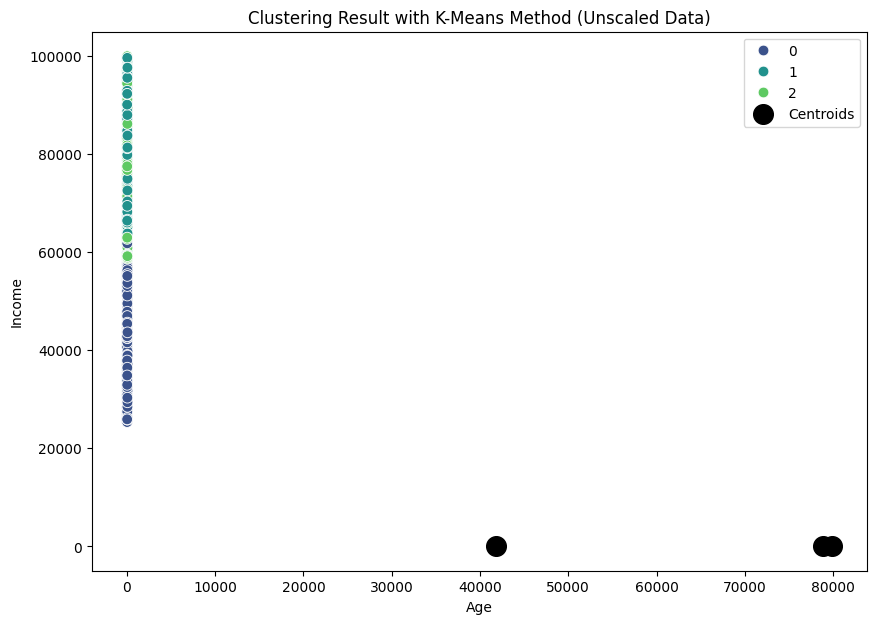

In [194]:
# visualize the result using scater chart on unscaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters1, palette=sns.color_palette('viridis', n_colors=len(np.unique(clusters1))), data=df, s = 60)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()
plt.show()

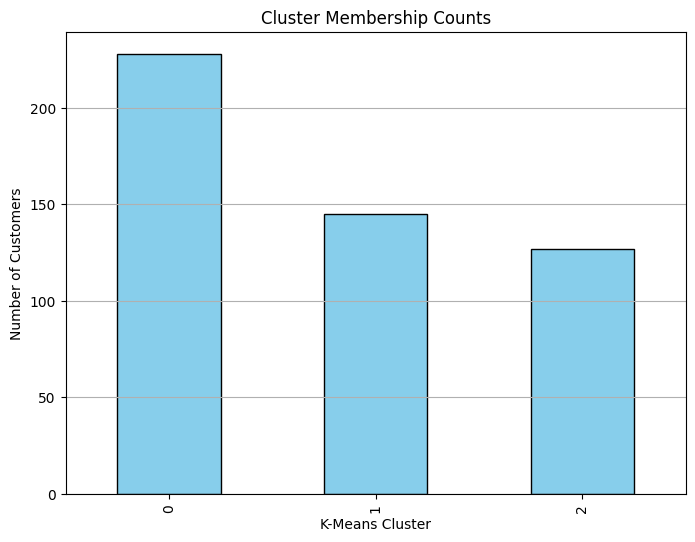

In [195]:
cluster_counts = df['KMeans_Unscaled_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [196]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters1).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_Unscaled_Cluster')

cluster_summary

Age                Income               \
                              mean min max          mean          min   
KMeans_Unscaled_Cluster                                                 
0                        39.973684  18  64  41785.918734  25352.16071   
1                        41.193103  18  64  79841.469843  56774.10995   
2                        38.724409  18  64  78883.535088  54737.93056   

                                      
                                 max  
KMeans_Unscaled_Cluster               
0                        61772.90099  
1                        99580.05922  
2                        99913.52549

### Silhouette Score

In [197]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans # Re-import to ensure fresh instances if needed

# --- For Scaled Data ---
# Re-initialize and re-fit `kmeans` for scaled data to ensure clean state and correct feature names tracking.
# `optimal_clusters` for scaled data was 4.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0, n_init=10)
kmeans.fit(df_scaled) # Fit on the DataFrame with correct numerical_cols
scaled_cluster_labels = kmeans.labels_ # Get labels after fitting

# Silhouette Score for Scaled Data
silhouette_avg_scaled = silhouette_score(df_scaled, scaled_cluster_labels)
print(f"Silhouette Score for Scaled Data (K=4): {silhouette_avg_scaled:.4f}")

# --- For Unscaled Data ---
# Re-initialize and re-fit `kmeans1` for unscaled data to ensure clean state and correct feature names tracking.
# `optimal_clusters` for unscaled data was 3.
# The original `kmeans1` was fitted on `df` (all its current columns), so we should use `df` here.
kmeans1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, n_init=10)
kmeans1.fit(df) # Fit on the full DataFrame 'df' as done previously for unscaled
unscaled_cluster_labels = kmeans1.labels_ # Get labels after fitting

# Silhouette Score for Unscaled Data
# Use the full `df` as it was used for fitting `kmeans_unscaled`
silhouette_avg_unscaled = silhouette_score(df, unscaled_cluster_labels)
print(f"Silhouette Score for Unscaled Data (K=3): {silhouette_avg_unscaled:.4f}")

Silhouette Score for Scaled Data (K=4): 0.0782
Silhouette Score for Unscaled Data (K=3): 0.3621


## Add Cluster Labels to DataFrames

### Subtask:
Add the `scaled_cluster_labels` to `df_scaled` as 'KMeans_Cluster_Scaled' and `unscaled_cluster_labels` to `df` as 'KMeans_Cluster_Unscaled' for consistent plotting.


In [198]:
df_scaled['KMeans_Cluster_Scaled'] = scaled_cluster_labels
df['KMeans_Cluster_Unscaled'] = unscaled_cluster_labels

print("df_scaled with new cluster labels:")
display(df_scaled.head())

print("\ndf with new cluster labels:")
display(df.head())

df_scaled with new cluster labels:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,KMeans_Cluster_Scaled
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,2
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,2



df with new cluster labels:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Unscaled_Cluster,KMeans_Cluster_Unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,2,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,1,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,2,1
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,1,2
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1,2


## 2D Cluster Visualization (Scaled Data)

### Subtask:
Generate a 2D scatter plot showing 'Age' vs 'Income' from the `df_scaled` DataFrame, colored by 'KMeans_Cluster_Scaled' (4 clusters). Cluster centroids will be plotted.


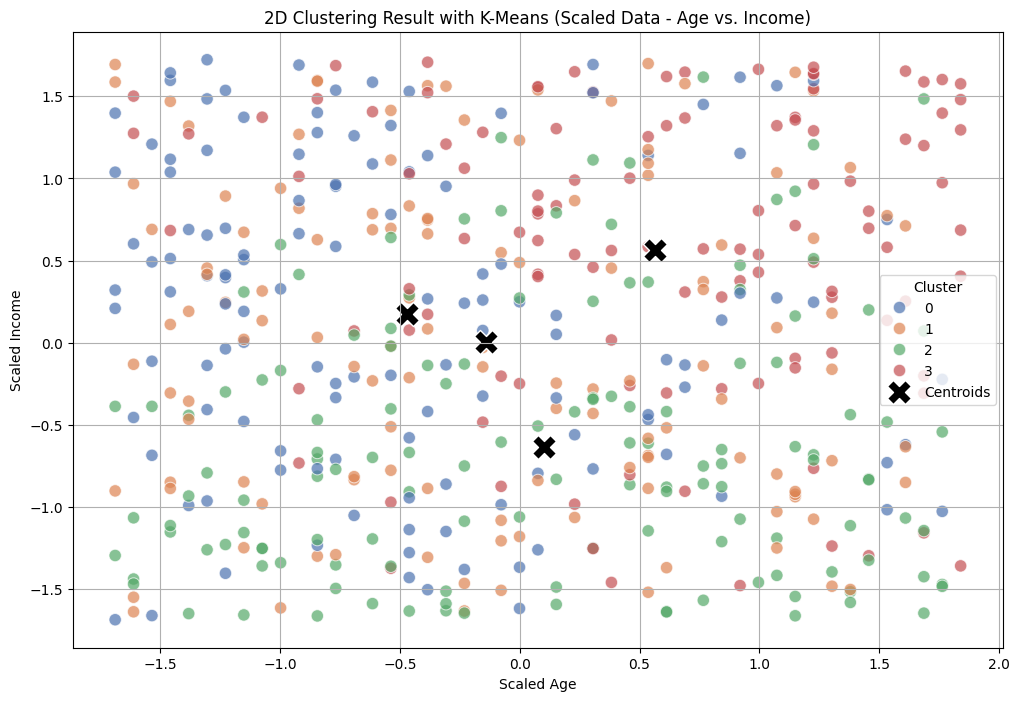

In [199]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',
    y='Income',
    hue='KMeans_Cluster_Scaled',
    palette=sns.color_palette('deep', n_colors=len(np.unique(df_scaled['KMeans_Cluster_Scaled']))), # Use a palette that distinguishes 4 clusters
    data=df_scaled,
    s=80,
    alpha=0.7
)

# Get the indices for 'Age' and 'Income' columns to correctly plot centroids
age_col_idx = df_scaled.columns.get_loc('Age')
income_col_idx = df_scaled.columns.get_loc('Income')

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, age_col_idx],
    kmeans.cluster_centers_[:, income_col_idx],
    s=300,
    marker='X',
    c='black',
    edgecolor='white',
    label='Centroids'
)

plt.title('2D Clustering Result with K-Means (Scaled Data - Age vs. Income)')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## 2D Cluster Visualization (Unscaled Data)

### Subtask:
Generate a 2D scatter plot showing 'Age' vs 'Income' from the original `df` DataFrame, colored by 'KMeans_Cluster_Unscaled' (3 clusters). Cluster centroids will be plotted.


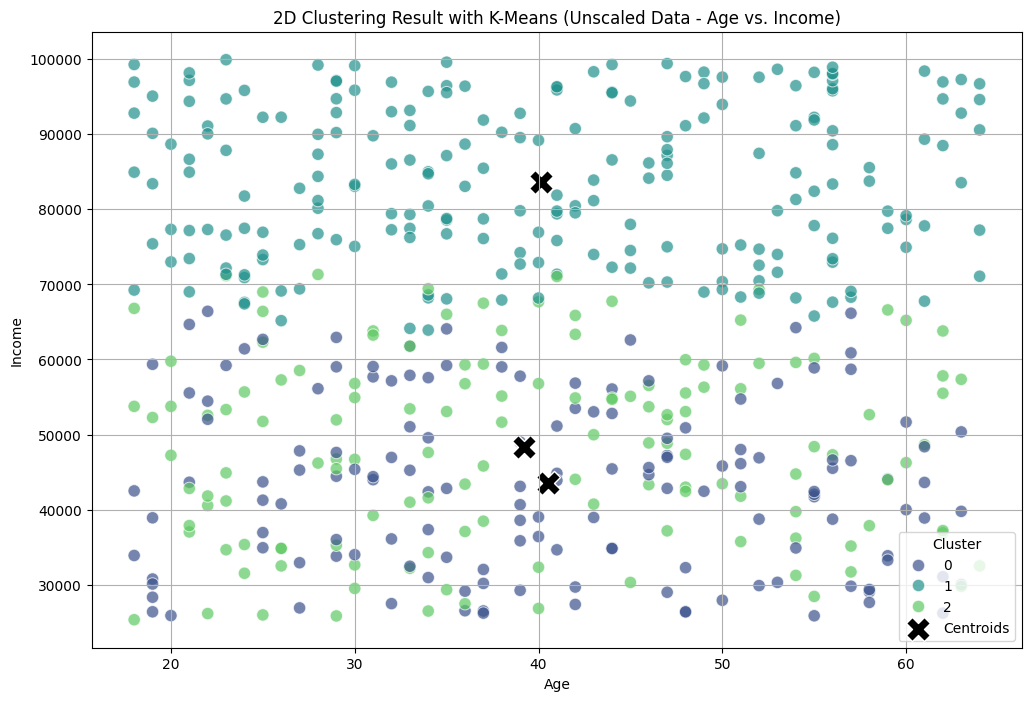

In [200]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',
    y='Income',
    hue='KMeans_Cluster_Unscaled',
    palette=sns.color_palette('viridis', n_colors=len(np.unique(df['KMeans_Cluster_Unscaled']))), # Use a palette that distinguishes 3 clusters
    data=df,
    s=80,
    alpha=0.7
)

# Get the indices for 'Age' and 'Income' columns from the original df
age_col_idx_unscaled = df.columns.get_loc('Age')
income_col_idx_unscaled = df.columns.get_loc('Income')

# Plot the centroids using kmeans1.cluster_centers_
plt.scatter(
    kmeans1.cluster_centers_[:, age_col_idx_unscaled],
    kmeans1.cluster_centers_[:, income_col_idx_unscaled],
    s=300,
    marker='X',
    c='black',
    edgecolor='white',
    label='Centroids'
)

plt.title('2D Clustering Result with K-Means (Unscaled Data - Age vs. Income)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## 3D Cluster Visualization (Scaled Data)

### Subtask:
Generate a 3D scatter plot showing 'Age', 'Income', and 'Credit_Score' from the `df_scaled` DataFrame, colored by 'KMeans_Cluster_Scaled' (4 clusters). Cluster centroids will be plotted.


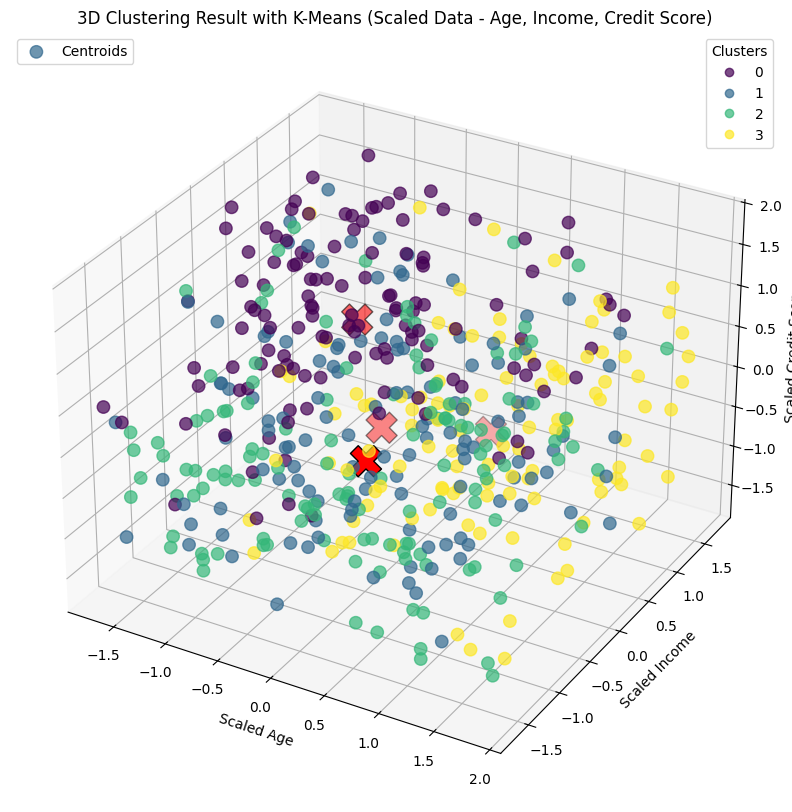

In [201]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the indices for 'Age', 'Income', and 'Credit_Score' columns
age_col_idx = df_scaled.columns.get_loc('Age')
income_col_idx = df_scaled.columns.get_loc('Income')
credit_score_col_idx = df_scaled.columns.get_loc('Credit_Score')

# Scatter plot the data points
scatter = ax.scatter(
    df_scaled['Age'],
    df_scaled['Income'],
    df_scaled['Credit_Score'],
    c=df_scaled['KMeans_Cluster_Scaled'],
    cmap='viridis', # Using a colormap for 4 distinct clusters
    s=80,
    alpha=0.7,
    label='Customers'
)

# Plot the centroids
ax.scatter(
    kmeans.cluster_centers_[:, age_col_idx],
    kmeans.cluster_centers_[:, income_col_idx],
    kmeans.cluster_centers_[:, credit_score_col_idx],
    s=500, # Larger size for centroids
    marker='X',
    c='red',
    edgecolor='black',
    label='Centroids'
)

ax.set_title('3D Clustering Result with K-Means (Scaled Data - Age, Income, Credit Score)')
ax.set_xlabel('Scaled Age')
ax.set_ylabel('Scaled Income')
ax.set_zlabel('Scaled Credit Score')

# Create a legend for clusters and centroids
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.legend(['Centroids'], loc='upper left') # Add legend for centroids separately

plt.show()

## 3D Cluster Visualization (Unscaled Data)

### Subtask:
Generate a 3D scatter plot showing 'Age', 'Income', and 'Credit_Score' from the original `df` DataFrame, colored by 'KMeans_Cluster_Unscaled' (3 clusters). Cluster centroids will be plotted.


**Reasoning**:
To visualize the 3D clustering result for the unscaled data, I will generate a 3D scatter plot using the 'Age', 'Income', and 'Credit_Score' columns from the `df` DataFrame, colored by the 'KMeans_Cluster_Unscaled' labels, and overlay the corresponding cluster centroids.



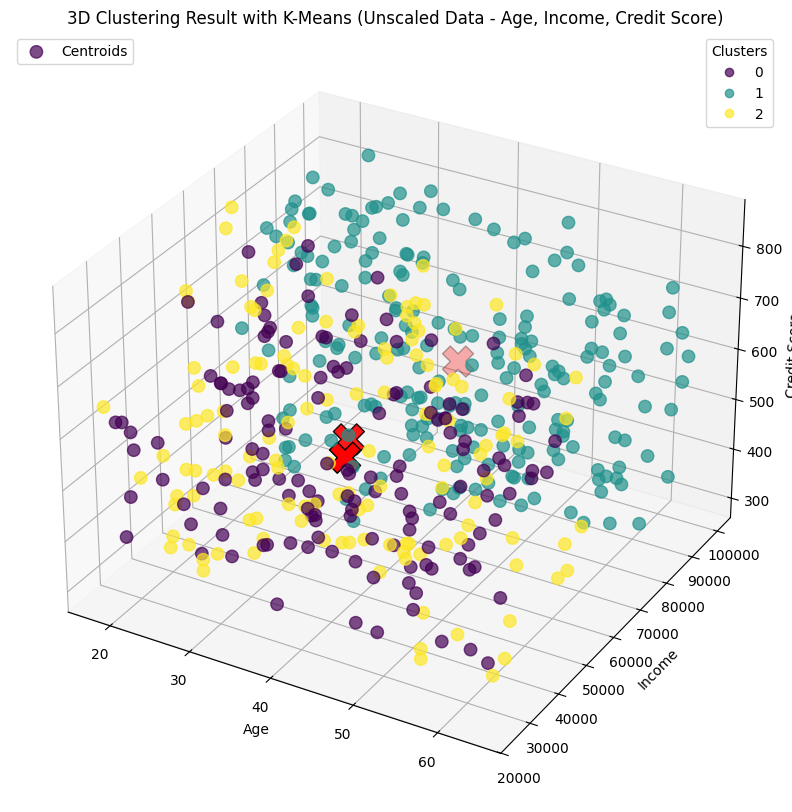

In [203]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the indices for 'Age', 'Income', and 'Credit_Score' columns from the original df
age_col_idx_unscaled = df.columns.get_loc('Age')
income_col_idx_unscaled = df.columns.get_loc('Income')
credit_score_col_idx_unscaled = df.columns.get_loc('Credit_Score')

# Scatter plot the data points
scatter = ax.scatter(
    df['Age'],
    df['Income'],
    df['Credit_Score'],
    c=df['KMeans_Cluster_Unscaled'],
    cmap='viridis', # Using a colormap for 3 distinct clusters
    s=80,
    alpha=0.7,
    label='Customers'
)

# Plot the centroids
ax.scatter(
    kmeans1.cluster_centers_[:, age_col_idx_unscaled],
    kmeans1.cluster_centers_[:, income_col_idx_unscaled],
    kmeans1.cluster_centers_[:, credit_score_col_idx_unscaled],
    s=500, # Larger size for centroids
    marker='X',
    c='red',
    edgecolor='black',
    label='Centroids'
)

ax.set_title('3D Clustering Result with K-Means (Unscaled Data - Age, Income, Credit Score)')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Credit Score')

# Create a legend for clusters and centroids
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.legend(['Centroids'], loc='upper left') # Add legend for centroids separately

plt.show()

## Part D – Segmentation & Managerial Implication

### 1. Summarize and discuss which model is better:

**Which version (scaled or unscaled) produces clearer cluster separation?**

 * Based on the Silhouette Score, the unscaled data (score: 0.3621) produced mathematically clearer and better-defined cluster separation compared to the scaled data (score: 0.0782). A higher silhouette score indicates that the clusters are more distinct from each other and the data points within them are more cohesive.

 **Why does scaling affect the clustering result?**

 * Feature Dominance: Without scaling, features with larger numerical ranges (e.g., 'Income' ranging from thousands to tens of thousands) tend to dominate the distance calculations. Their variations will contribute much more to the Euclidean distance between points than features with smaller ranges (e.g., 'Age' ranging from tens to maybe a hundred). This means the clustering algorithm will primarily group data points based on these larger-magnitude features, potentially overlooking important patterns in smaller-magnitude features.

* Equal Contribution of Features: Scaling techniques like StandardScaler normalize the features so that they all have a similar range (e.g., a mean of 0 and a standard deviation of 1). This ensures that each feature contributes relatively equally to the distance calculations. As a result, the clustering algorithm considers the variations in all features more fairly when forming clusters.

* Cluster Shape and Compactness: K-Means aims to find spherical clusters. When data is unscaled, clusters can become elongated or stretched along the dimensions with higher variance, making it harder for the algorithm to find truly compact, spherical groups. Scaling helps transform the data so that clusters are more likely to be spherical, which aligns better with the underlying assumptions of the K-Means algorithm. This often leads to visually more appealing and seemingly better-separated clusters in plots, even if the silhouette score might sometimes indicate otherwise for a given k.

### 2. Analyze and interpret each cluster’s characteristics ( Unscaled Data because it has a better score )

**Cluster 0:**

* Age: This cluster has a mean age of approximately 40 years, with customers ranging from 18 to 64 years old. This suggests a broad age distribution.
* Income: The average income in this cluster is around 41,785, which is the lowest among all clusters, with a maximum income of about 61,772.
* Interpretation: This cluster appears to represent Mid-aged to older customers with lower income. They are likely budget-conscious individuals.

**Cluster 1:**

* Age: The mean age for this group is about 41 years, similar to Cluster 0, with a full age range from 18 to 64.
* Income: This cluster shows a high average income of approximately 79,841, with incomes starting from around 56,774 up to 99,580. This makes it one of the higher-earning groups.
* Interpretation: This cluster can be characterized as Mid-aged, high-income customers. They represent a financially affluent segment.

**Cluster 2:**

* Age: With a mean age of around 38 years, this cluster is slightly younger on average compared to the other two, but still covers a wide age range from 18 to 64.
* Income: The average income is high, at approximately 78,883, very close to Cluster 1, with a range from about 54,737 to 99,913.
* Interpretation: This cluster represents Slightly younger, high-income customers. They share financial characteristics with Cluster 1 but tend to be a bit younger on average.

### 3. Provide managerial recommendations

**Cluster 0: Mid-aged to older customers with lower income**
* Product/Service Design: Focus on value-for-money products and essential services. Offer budget-friendly packages, clear and simple financial products (e.g., basic savings accounts, low-fee credit cards with essential benefits). Emphasize reliability and security over flashy features.
* Marketing Campaigns: Highlight affordability, long-term value, and stability. Use practical messaging that speaks to financial security and cost-saving. Reach them through community outreach, traditional media (local newspapers, TV), and clear, easy-to-understand digital communications.
* Prioritization (Retention): This segment is likely price-sensitive and values loyalty. Prioritize retention through excellent, empathetic customer service, loyalty programs, and offering discounts or bundled services that help them manage their finances efficiently. Growth could come from cross-selling essential, low-cost services.

**Cluster 1: Mid-aged, high-income customers**
* Product/Service Design: Develop premium and exclusive products such as advanced wealth management services, high-yield investment opportunities, platinum credit cards with extensive benefits (travel, concierge), and personalized financial advisory services. Focus on convenience, luxury, and maximizing returns.
* Marketing Campaigns: Emphasize exclusivity, status, and personalized solutions. Highlight how products can save them time, grow their wealth, and offer unique experiences. Reach them through targeted digital ads, luxury lifestyle publications, and direct, personalized communications.
* Prioritization (Growth & Retention): This is a highly valuable segment for both growth and retention. Grow by upselling and cross-selling sophisticated financial products and investment opportunities. Retain through dedicated relationship managers, exclusive access to events or insights, and consistent delivery of superior service that acknowledges their high value.

**Cluster 2: Slightly younger, high-income customers**
* Product/Service Design: Offer innovative, technology-driven solutions that align with a digital-first lifestyle. This includes robust online banking platforms, mobile-first investment apps, flexible loan options, and possibly services related to sustainable investing or wealth transfer. Focus on convenience, speed, and cutting-edge features.
* Marketing Campaigns: Focus on innovation, digital convenience, and future planning. Use modern, dynamic advertising through social media platforms, tech-focused publications, and digital content creators. Highlight how products integrate seamlessly with their lifestyle and help achieve future goals.
* Prioritization (Growth): This segment is prime for growth through new product adoption and digital engagement. Encourage early adoption of new technologies and services. Retain by providing seamless digital experiences, proactive customer support through digital channels, and continually updating offerings to meet evolving tech and lifestyle demands.